In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diagnostic.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
x = df.drop('DEATH_EVENT', axis=1)

In [7]:
y = df['DEATH_EVENT']

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

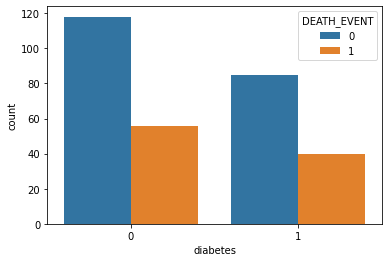

In [9]:
sb.countplot(x='diabetes',data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

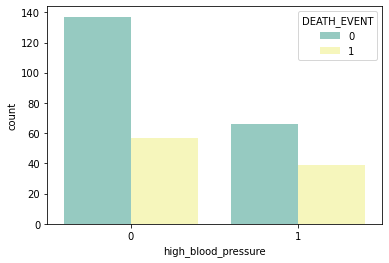

In [10]:
sb.countplot(x='high_blood_pressure',data=df,hue='DEATH_EVENT',palette="Set3")

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
d_tree = DecisionTreeClassifier()

In [15]:
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
x_test.shape

(90, 12)

In [17]:
x_train.shape

(209, 12)

In [18]:
pred = d_tree.predict(x_test)

In [19]:
pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0], dtype=int64)

In [20]:
y_test

296    0
162    0
292    0
269    0
198    0
      ..
181    1
286    0
38     0
288    0
275    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [21]:
d_tree.score(x_test, y_test)

0.7555555555555555

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [23]:
cm = confusion_matrix(y_test, pred)
cm

array([[47, 17],
       [ 5, 21]], dtype=int64)

In [24]:
# cross check for decision tree score by Accuracy law
accuracy = (48 + 19) / (48 + 10 + 13 + 19)
accuracy

0.7444444444444445

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        64
           1       0.55      0.81      0.66        26

    accuracy                           0.76        90
   macro avg       0.73      0.77      0.73        90
weighted avg       0.80      0.76      0.77        90



In [26]:
#check accuracy score
accuracy_score(y_test, pred)

0.7555555555555555

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
ran = RandomForestClassifier()

In [29]:
ran.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
ran.score(x_test, y_test)

0.8888888888888888

# Randomized Search Cv

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
rnf = RandomForestClassifier()

In [33]:
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 500, num = 15)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [2, 3, 4, 5, 6, 7, 8]
min_samples_split = [2, 5, 10, 12, 15]
min_samples_leaf = [2, 4, 6, 8, 10, 15]

#Create ids
grids = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion':['entropy','gini']
}

print(grids)

{'n_estimators': [150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 5, 10, 12, 15], 'min_samples_leaf': [2, 4, 6, 8, 10, 15], 'criterion': ['entropy', 'gini']}


In [34]:
rmcv = RandomizedSearchCV(estimator = rnf, param_distributions= grids, n_iter=200,n_jobs = -1, cv=3)

In [35]:
rmcv.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10,
                                                             15],
                                        'min_samples_split': [2, 5, 10, 12, 15],
                                        'n_estimators': [150, 175, 200, 225,
                                                         250, 275, 300, 325,
                                                         350, 375, 400, 425,
                                                         450, 475, 500]})

In [36]:
rmcv.best_params_

{'n_estimators': 325,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy'}

In [37]:
best_parameters = rmcv.best_estimator_

In [38]:
best_parameters

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=12,
                       n_estimators=325)

In [39]:
rmcv.cv_results_

{'mean_fit_time': array([0.71238661, 1.12079946, 0.62013094, 0.41146676, 1.60638309,
        0.99364352, 0.90066504, 1.18533587, 0.52066787, 1.269665  ,
        0.71666654, 0.95932666, 1.28150741, 1.27213629, 0.52002056,
        0.96137738, 1.11836831, 1.43399747, 1.27966611, 0.94666417,
        0.62933127, 1.11399738, 1.16399709, 0.82699966, 0.659     ,
        0.55067023, 0.5003008 , 0.48375948, 1.3351957 , 0.82892211,
        0.57441425, 0.76066558, 0.83499845, 0.65133301, 0.51100039,
        0.89358791, 0.95652692, 1.53132717, 0.97532574, 1.58767867,
        0.86933319, 0.53566972, 1.06933347, 0.8706642 , 0.64466524,
        1.09966723, 0.86733333, 0.80733204, 1.10300024, 0.5469962 ,
        1.65866415, 1.24399829, 0.59766523, 1.34033036, 1.08966621,
        1.51468341, 0.89257733, 1.48994724, 1.61689361, 0.94851017,
        1.20972037, 0.96899915, 1.04000274, 1.38166062, 0.57066099,
        0.44066525, 1.6639479 , 0.6645809 , 1.21666574, 0.80599316,
        0.96766535, 1.80899803,

In [40]:
results = pd.DataFrame(rmcv.cv_results_)

In [41]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.712387,0.019245,0.046868,8.878936e-06,200,5,8,log2,3,gini,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.814286,0.871429,0.797101,0.827605,0.031772,84
1,1.120799,0.032111,0.077081,1.149953e-02,375,2,8,log2,6,gini,"{'n_estimators': 375, 'min_samples_split': 2, ...",0.828571,0.885714,0.811594,0.841960,0.031706,11
2,0.620131,0.073184,0.046877,3.114687e-06,200,2,15,auto,8,entropy,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.742857,0.842857,0.782609,0.789441,0.041110,179
3,0.411467,0.007365,0.031248,1.123916e-07,150,10,6,auto,4,entropy,"{'n_estimators': 150, 'min_samples_split': 10,...",0.814286,0.885714,0.797101,0.832367,0.038369,57
4,1.606383,0.046188,0.109000,1.779304e-02,425,15,8,log2,6,entropy,"{'n_estimators': 425, 'min_samples_split': 15,...",0.814286,0.885714,0.811594,0.837198,0.034324,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.939114,0.041680,0.066656,1.346103e-02,250,12,4,auto,5,entropy,"{'n_estimators': 250, 'min_samples_split': 12,...",0.842857,0.871429,0.811594,0.841960,0.024436,11
196,1.734656,0.051710,0.122984,1.189054e-02,475,15,4,sqrt,3,gini,"{'n_estimators': 475, 'min_samples_split': 15,...",0.800000,0.871429,0.811594,0.827674,0.031299,75
197,1.167855,0.096490,0.106332,2.858010e-02,350,12,6,auto,3,gini,"{'n_estimators': 350, 'min_samples_split': 12,...",0.814286,0.828571,0.753623,0.798827,0.032491,173
198,1.457246,0.113626,0.088538,7.363504e-03,475,12,6,sqrt,2,gini,"{'n_estimators': 475, 'min_samples_split': 12,...",0.814286,0.800000,0.753623,0.789303,0.025895,187


In [42]:
best_parameters.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0], dtype=int64)

In [43]:
best_parameters.score(x_test, y_test)

0.8888888888888888